# STA 208: Homework 1 (Do not distribute)

## Due 4/10/19 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.
---
**Answer**: Write the true risk as a function of the Hamming Loss,

$$\begin{align}
R(g)&=\mathbb E \mathbf{1}\{g(X) \neq Y\} \\
    &=\sum_{i=0}^{\infty} \mathbf{1}\{Y_i\neq g(X_i)\}f_{X_i,Y_i}(x_i,y_i) \\
    &=\sum_{i=0}^{\infty} \mathbf{1}\{Y_i\neq g(X_i)\}f_{Y_i}(y_i|x_i)f_{X_i}(x_i)
\end{align}$$

The predictor that minimizes $R(g)$ is written as

$$
\begin{align}
   g^* &=\underset{g\in\{0,1\}}{\text{argmin}} \sum_{i=0}^{\infty} \mathbf{1}\{Y_i\neq g(X_i)\}f_{Y_i}(y_i|x_i)f_{X_i}(x_i)        
\end{align}
$$

---
2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h_j(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
---
**Answer**: Write the empirical risk as a function of the Hamming Loss and the given Bayes Rule,

$$\begin{align}
R_n(g)&=\frac{1}{n}\sum_{i=1}^n \ell(y_i,g(x_i)) \\
    &=\frac{1}{n}\sum_{i=1}^n \mathbf{1}\{h(x_{i,j} > 0 )\neq y_i\} 
\end{align}$$

Denote class `BinaryClassifierRegressor` with `fit`, `predict` methods:

```python
import numpy as np
class BinaryClassifierRegressor:
    """
    : A regression object that uses Bayes Rule to fit and predict
    """
    
    def __init__(self):
        """
        : Init j=1, n=# of observations
        """
        self.j = 1
        self.n = X.shape[0]
    
    def fit(self, X, y, j_cand):
        """
        : Iterate over j in [1,p], assess Empirical Risk for each j
        : Store j that minimizes Empirical Risk
        """
        R_min = 10e3 # dummy value for minimum risk
        j = p+1
        for j_cand in range(1,p+1):
            R_temp = self.risk(X,y,j_cand)
            if R_temp < R_min:
                j = j_cand
        self.j = j

    def predict(self, X):
        """
        : Return y_hat for X_test based on the Bayes Rule predictor
        """
        y_hat = np.zeros(self.n)
        for i in range(self.n):
            if X[i,j] > 0:
                y_hat[i] = 1
        return y_hat

    def risk(self, X, y, j):
        """
        : Calculate empirical risk based on j-th element per observation
        """
        risk=0
        for i in range(self.n):
            if X[i,j] ~= y[i]:
                risk += 1
        return risk/n
        
```

---


3. (Challenging) Suppose that I told you that for any fixed $j$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(h_j) - R(h_j)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
Where $h$ is the Bayes rule, namely, the $h_j$ that minimizes $R$. (Hint: use the union bound to show that $R_n(\hat g) \approx R(\hat g)$ and use the fact that $R_n(\hat g) \le R_n(h_j)$ for any $j$ because it is in the minimizer.)

---
**Answer**: Write the supremum of the Bayes classifier

$$
\begin{align}
    P\left\{\bigcup_{j\in[1,\dots,p]}|R_n(h_j) - R(h_j)| > t\right\} &\leq \sum_{j=1}^p P\{|R_n(h_j) - R(h_j)| > t\} \text{ (Union Bound)}\\
                                 &\leq p\cdot P\{|R_n(h_j) - R(h_j)| > t\} \text{ (i.i.d. }h_j)\\
                                 &\leq p\cdot 2\text{exp}(-2nt^2) \text{ (Hoeffding's inequality)} \label{eq:p1.3-1}\tag{1}
\end{align}
$$

Rewrite the LHS as

$$
\begin{align}
    P\left\{\bigcup_{j\in[1,\dots,p]}|R_n(h_j) - R(h_j)| > t\right\} &= P\left\{|R_n(h) - R(h)| > t\right\} \\
    &= 2P\left\{R_n(h) - R(h) > t\right\} \text{ (by symmetry)} \label{eq:p1.3-2}\tag{2}
\end{align}
$$

Combine ([1](#mjx-eqn-eq13_1)) with ([2](#mjx-eqn-eq13_2)) and write

$$\begin{align}
    2P\left\{R_n(h) - R(h) > t\right\} &\leq p\cdot 2\text{exp}(-2nt^2) \\
    P\left\{R_n(h) - R(h) > t\right\} &\leq p\cdot \text{exp}(-2nt^2) \\
    1-P\left\{R_n(h) - R(h) < t\right\} &\leq p\cdot \text{exp}(-2nt^2) \\
    1-p\cdot \text{exp}(-2nt^2) &\leq P\left\{R_n(h) - R(h) < t\right\}
\end{align}
$$

Note that $R_n(\hat g) \leq R_n(h),$ and plug in the target probability, 0.95, yielding
$$
\begin{align}
    1-p\cdot \text{exp}(-2nt^2) &\leq 0.95 \\
\end{align}
$$

The target probability is $0.95$, so we set the RHS of ([1](#mjx-eqn-eq13)) to 0.95 and solve for $n$

$$\begin{align}
    0.95 &\geq 1-p\cdot\text{exp}(-2nt^2) \\
    \text{exp}(-2nt^2) &\geq \frac{0.05}{p}\\
    n &\geq \frac{\log (0.05/p)}{-2(0.1^2)} 
\end{align}
$$

Plug in $p=10, t=0.1$ and find that $n \geq 264.9.$. Thus, we choose $n=265$.

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)  You can just write it in words or pseudocode. 
---
**Answer**: We seek $H$ for the two regression schemes.

**Least Squares**: OLS regression is defined as
$$
\begin{align}
    \hat y &= \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_{n+1,j} \\
\end{align}
$$

The vector representation of the regression coeffients is

$$
\begin{align}
    \hat{\beta} &= \begin{bmatrix}\beta_0 & \beta_1 & \dots & \beta_p \end{bmatrix} \\
                &= (X^TX)^{-1}X^T \mathbf{y}
\end{align}                
$$

Which admits the OLS regression
$$
\begin{align}
    \hat y &= X \hat \beta \\
           &= X(X^TX)^{-1}X^T \mathbf{y} \\
           &= H\mathbf{y}
\end{align}
$$

Where $H=X(X^TX)^{-1}X$.

**K Nearest Neighbors**: KNN is defined as

$$
\begin{align}
    \hat y &= \frac{1}{K}\sum_{k=1}^K y_{j_k}
\end{align}
$$

The `class KNNRegressor` pseudocode describes the `predict` and `fit` methods for KNN (Note: `predict` constructs the desired matrix $H$):
```python
class KNNRegressor:
    """
    : A regression object that fits by finding H
    """
    
    def __init__(self):
        """
        : Init k=5, n=# of observations, p=dimen of observations
        """
        self.k = 5 # close enough ;)
        (self.n, self.p) = X.shape
    
    def fit(self, X, y):
        """
        : -> (n, p) = X.shape
        : -> Init H=np.zeros(n, n)
        : -> For i in [1,n]
        :    -> for j in [1,n]
        :        -> Calculate d_metric(x_i,x_j) , 
        :        -> Sort resulting d(x_i,x_j) values (d_sorted)
        :        -> Pick K nearest neighbors from sorted d(x_i,x_j) values
        :        -> for k in [1,K]
        :            -> Store (1/K) in H[i,j_k] for k in [1,K]
        : -> self.y_train = y
        : -> self.H = H
        : -> self.n = n
        : -> self.p = p
        : -> return matmul(H,y)
        """
        
    def predict(self, X_test):
        """
        : -> n_test = X_test.shape[0]
        : -> Init H=np.zeros(n_test, self.n)
        : -> For i in [1,n_test]
        :    -> for j in [1,n]
        :        -> Calculate d_metric(x_i,x_j) , 
        :        -> Sort resulting d(x_i,x_j) values
        :        -> Pick K nearest neighbors from sorted d(x_i,x_j) values
        :        -> for k in [1,K]
        :            -> Store (1/K) in H[i,j_k] for k in [1,K]
        : -> return matmul(H,self.y_train)
        """
            
    def d_metric(self, x_1,x_2):
        """
        : Metric measuring distance between two observations
        : (e.g. Euclidean, Hamming, Manhattan, Chebyshev distance)
        """
        return d(x_1,x_2)

```

---
2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. You can just write it in words or pseudocode. 

---

**Answer**: To perform leave one out cross validation, implement the following pseudocode

```python
class OneOutCrossValidate(KNNRegressor):
    def __init__(self):
        KNNRegressor.__init__(self)

    def predict(self, X_test):
        """
        : # update KNNRegressor prediction function to exclude current point
        : -> n_test = X_test.shape[0]
        : -> Init H=np.zeros(n_test, self.n)
        : -> For i in [1,n_test]
        :    -> for j in [1,n]
        :        -> Calculate d_metric(x_i,x_j) , 
        :        -> Sort resulting d(x_i,x_j) values
        :        -> Pick K nearest neighbors (current point excluded) from sorted d(x_i,x_j) values
        :        -> for k in [2,K+1]
        :            -> Store (1/K) in H[i,j_k] for k in [1,K]
        : -> return matmul(H,self.y_train)
        """
        
    def loo_validate(self, X, y):
        """
        : # Leave one out cross validation
        : # Train on n-1 samples, test on left-out sample
        : -> MSE = 0
        : -> for i in range(self.n):
            -> X_tr, y_tr, X_out, y_out = self.loo_split(X,y,i)
            -> self.fit(X_tr, y_tr)
            -> y_hat = self.predict(X_out)
            -> MSE += (y_out-y_hat)**2/self.n
        : -> return MSE
        """
        
    def loo_split(self,X,y,i):
        """
        : return np.hstack((X[:i,:],X[i+1:,:])), np.hstack((y[:i],X[i+1:])), X[i,:], y[i]
        """
    
```

---

3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.

---

**Answer**: Recall the form of the OLS coefficients $\beta=(X^TX)^{-1}X^T\vec{y}$. We seek $\beta=A\vec{b}$, which we can relate to the definition of the OLS coefficients as

$$
\begin{align}
    A &= (X^TX)^{-1} \\
      &= (VD^TU^TUDV^T)^{-1} \\
      &= (VD^T D V^T)^{-1}X^T \\
      % &= || DV^T ||_2 (p \times p) \\
    b &= \vec{y} 
      % &= VD^TU^T\vec{y}
\end{align}
$$

---

4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal, the remainder will be set to 0, and only the first $r$ columns of $U,V$ woud be used. Let $U_r, D_r, V_r$ be matrices of dimension $(n \times r),(r \times r),(r \times p)$, respectively. Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U D_r V^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

---
**Answer**: `change_rank` requires computing $A_r=U_rD_rV^T_r$. To do this, store the following matrices

1. $U_r \leftarrow U[0:r,:]$ (first $r$ columns of $U$)
2. $D_r \leftarrow D[0:r,0:r]$ ($r\times r$ submatrix of $D$). 
3. $V_r^T \leftarrow U[:,0:r]$ (first $r$ rows of $U$)

where $U,D,V^T$ are all available after calling `SVRegressor.fit()`. Then, compute $\beta_r=A_r b$. The `change_rank` method only requires calculating $A_r$,

$$
\begin{align}
    A_r &= (V_rD_r^T D_r V_r^T)^{-1}X_r^T \\
\end{align}
$$

the computational complexity of which is:

1. $M_1=(V_rD_r^T D_r V_r^T) \implies O(rp^2)$ (sequential matrix multiplications)
2. $M_1^{-1} \implies O(p^3)$ (matrix inversion)
3. $A_r=M_1^{-1}X^T \implies O(p^2n)$ (matrix multiplication)

Meaning the computational complexity is $\approx O(p^3).$



__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [1]:
import numpy as np
from scipy.linalg import svd, solve
from sklearn.metrics import mean_squared_error

In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,param):
        """
        : Store the rank
        """
        self.r = param
        self.b = None
        self.name = "SingularValue"
        self.param_name = "rank" # for printing in matplotlib
        
    def fit(self,X,y): # TO-DO: Re-implement with new A_r def
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        : Compute R matrices for usage in change_rank
        """
        self.n, self.p = X.shape
        self.U, self.s, self.V_T = svd(X, full_matrices=False)
        # print('self.U.shape: {} - self.s.shape: {} - self.V_T.shape: {}'.format(self.U.shape,self.s.shape,self.V_T.shape))
        # self.get_R_mats() # R_mats subsumes the SVD matrices U, V
        self.b = y # b not dependent on SVD
        self.calc_beta() # calculate A, calculate \beta=Ab

    def calc_beta(self): # TO-DO: Re-implement with new A_r def
        """
        : Find \beta=Ab based on latest rank and R_i matrices
        """
        # s_r = [self.s[i] if i < self.r else 0 for i in range(self.p)]
        # D_r = np.diag(s_r)
        D_r = np.diag(self.s[:self.r]) # diagonal r x r matrix with sing. values up to s_r
        U_r = self.U[:,:self.r] # 'r' cols of U
        V_T_r = self.V_T[:self.r,:] # 'r' rows of V_T
        # X_r = self.U @ D_r @ self.V_T
        X_r = U_r @ D_r @ V_T_r
        # self.M = np.linalg.inv(self.V_T.T @ D_r.T @ D_r @ self.V_T) # sum first r matrices, take inverse
        self.M = np.linalg.inv(V_T_r.T @ D_r.T @ D_r @ V_T_r) # sum first r matrices, take inverse
        self.A = self.M @ X_r.T
        self.beta = np.dot(self.A,self.b)
        
    def get_R_mats(self):
        """
        : Calculate and store R_i matrices for i in range(p)
        """
        print("Getting R_mats...")
        R_mats = np.zeros((self.p,self.p,self.p))
        for i in range(self.p):
            v_T = self.V_T[i,:] # row from V_T
            out  = np.zeros((self.p,self.p)) 
            for j in range(self.p):
                out[j,:] = [v_T[j]*v_T[k] for k in range(self.p)]
            out = out*(self.s[i]**2)
            R_mats[i,:,:] = out
        self.R_mats = R_mats
        
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        return np.matmul(X_test,self.beta)
        
    def change_rank(self,param):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        # print("change_rank(r={})".format(param))
        self.r = param
        if (len(self.b) > 1):
            self.calc_beta()
        else:
            print("-> change_rank() was called before fit()")

In [3]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()
data_mat.shape

(398, 8)

## Define classes for different regressors

- Ridge Regression (tuning parameter = $\alpha$)
- OLS Regression (no tuning parameter)
- KNN Regression (tuning parameter = $k$)

In [6]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# ridge regression class
class RidgeRegressor():
    
    def __init__(self, param=1.0):
        self.alpha = param
        self.model = Ridge(alpha=self.alpha)
        self.name = "Ridge"
        self.param_name = r"$\alpha$" # for printing in matplotlib
        
    def load_optimal(self):
        self.alpha = 1.6
        self.model = Ridge(alpha=self.alpha)
        
    def fit(self, X, y):
        self.model.fit(X,y)
        
    def predict(self, X_test):
        return self.model.predict(X_test)
        
# ols
class OLSRegressor():
    
    def __init__(self):
        self.model = LinearRegression()
        self.name = "OLS"
    
    def fit(self, X, y):
        self.model.fit(X,y)
        
    def predict(self, X_test):
        return self.model.predict(X_test)


# knn
class KNNRegressor():
    def __init__(self,param=5):
        self.n_neighbors = param
        self.knn = KNeighborsRegressor(n_neighbors=self.n_neighbors)
        self.name = "KNN"
        self.param_name = r"$K$" # for printing in matplotlib
        
    def load_optimal(self):
        self.n_neighbors = 1
        self.knn = KNeighborsRegressor(n_neighbors=self.n_neighbors)
        
    def fit(self, X_tr, y_tr):
        self.knn.fit(X_tr,y_tr)
        
    def predict(self,X_te):
        return self.knn.predict(X_te)

In [7]:
class ModelTuner():
    def __init__(self,model_cls,param_arr,split_states,trials=100,test_size=0.15/.85):
        self.model_cls = model_cls
        self.split_states = split_states
        self.param_arr = param_arr
        self.trials = trials
        self.random_state = 42
        self.test_size = test_size
        
    def make_models(self):
        """
        : Make models for all params in param_arr
        : Store models for evaluation
        """
        self.models = []
        print("--- Make models for {} ---".format(self.model_cls.__name__))
        for param in self.param_arr:
            model = self.model_cls(param=param)
            self.models.append(model)
            
    def evaluate_models(self,X_std,y):
        """
        : Evaluate stored models over num_trials
        : Each trial should have same train/test split for all models
        """
        print("--- Evaluate models for {} over {} trials ---".format(self.model_cls.__name__, self.trials))
        num_param = len(self.param_arr)
        avg_mse = [0]*num_param
        for i in range(self.trials):
            self.trial_log(i,print_every=self.trials/10)
            # random training/test split
            X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X_std,y,test_size=self.test_size,random_state=self.split_states[i])
            for j in range(num_param):
                model = self.models[j]
                model.fit(X_tr,y_tr)
                y_hat = model.predict(X_te)
                mse = mean_squared_error(y_hat,y_te)
                avg_mse[j] += mse/self.trials
        self.avg_mse = avg_mse
                
    def get_best_model(self):
        """
        : Return best model with best param
        """
        print("--- Best model for {} ---".format(self.model_cls.__name__))
        ind_opt   = self.avg_mse.index(min(self.avg_mse))
        mse_opt   = self.avg_mse[ind_opt]
        param_opt = self.param_arr[ind_opt]
        print("For {}, best param={} with avg MSE={}".format(self.model_cls.__name__, param_opt, mse_opt))
        self.best_model = self.models[ind_opt]
        self.best_param = param_opt
        
    def plot_models(self):
        """
        : Print parameter tuning curve
        """
        plt.plot(self.param_arr, self.avg_mse)
        plt.xlabel(self.best_model.param_name)
        plt.ylabel('MSE')
        plt.show()
        
    def trial_log(self,trial,print_every=100):
        if trial % print_every == 0:
            print("-> {} -- Trial #{}".format(self.model_cls.__name__, trial))

class SVTuner(ModelTuner):
    
    def __init__(self,model_cls,param_arr,split_states,trials=100):
        ModelTuner.__init__(self,model_cls,param_arr,split_states,trials=trials)
        self.model = model_cls(param_arr[0])
        
    def evaluate_models(self,X_std,y):
        """
        : Evaluate SVRegressor with different ranks over num_trials
        : Each trial should have same train/test split for all ranks
        """
        print("--- Evaluate models for {} over {} trials ---".format(self.model_cls.__name__, self.trials))
        num_param = len(self.param_arr)
        avg_mse = [0]*num_param
        lo_mse = [1e6]*num_param # best-case mse
        hi_mse = [0]*num_param # worst-case mse
        for i in range(self.trials):
            self.trial_log(i,print_every=self.trials/10)
            attempts = 0
            pass_bool = False
            while ( not pass_bool and attempts < 10 ): # Attempt a split, sometimes this yields a singular value
                # attempt a random training/test split
                try:
                    X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X_std,y,test_size=self.test_size,random_state=self.split_states[i])
                    self.n_tr = X_tr.shape[0]
                    mse_temp = [0]*num_param # don't add to avg_mse unless all ranks pass
                    self.model.fit(X_tr,y_tr) # fit once for each trial
                    for j in range(num_param):
                        self.model.change_rank(self.param_arr[j]) #  use change_rank for new model
                        y_hat = self.model.predict(X_te)
                        mse = mean_squared_error(y_hat,y_te)
                        mse_temp[j] = mse
                    pass_bool = True
                except:
                    # print("Singular matrix. Re-splitting data.")
                    self.split_states[i] = self.split_states[i]+random.randint(0,self.n_tr)
                    attempts+=1
            if (attempts == 10):
                print("Too many singular matrices from training/testing split.")
                return None
            else:
                # add avg_mse_temp into avg_mse
                avg_mse = [avg_mse[i]+mse_temp[i]/self.trials for i in range(num_param)]
                lo_mse = [min(mse_temp[i],lo_mse[i]) for i in range(num_param)]
                hi_mse = [max(mse_temp[i],hi_mse[i]) for i in range(num_param)]
        self.avg_mse = avg_mse
        self.lo_mse = lo_mse
        self.hi_mse = hi_mse
    
    def get_best_model(self):
        """
        : Return best model with best rank
        """
        print("--- Best model for {} ---".format(self.model_cls.__name__))
        ind_opt   = self.avg_mse.index(min(self.avg_mse))
        mse_opt   = self.avg_mse[ind_opt]
        param_opt = self.param_arr[ind_opt]
        print("For {}, best param={} with avg MSE={}".format(self.model_cls.__name__, param_opt, mse_opt))
        self.model.change_rank(param_opt)
        self.best_model = self.model
        self.best_param = param_opt
        
    def plot_models(self):
        """
        : Print parameter tuning curve
        """
        plt.semilogy(self.param_arr, self.avg_mse, 'b-', self.param_arr, self.hi_mse, 'g-', self.param_arr, self.lo_mse, 'r-')
        plt.xlabel(self.best_model.param_name)
        plt.ylabel('MSE')
        plt.legend(["Average MSE","Worst-case MSE","Best-case MSE"])
        plt.show()
        
class OLSTuner(ModelTuner):
    # stripped-down Tuner for OLS
    def __init__(self,model_cls,split_states,trials=100):
        ModelTuner.__init__(self,model_cls,None,split_states,trials=trials)
        self.model = model_cls()
        
    def evaluate_models(self,X_std,y):
        """
        : Evaluate OLS over # trials -- no params
        """
        print("--- Evaluate OLS for {} trials ---".format(self.trials))
        avg_mse = 0
        for i in range(self.trials):
            # random training/test split
            X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X_std,y,test_size=self.test_size,random_state=self.split_states[i])
            ols = OLSRegressor()
            ols.fit(X_tr,y_tr)
            y_hat = ols.predict(X_te)
            mse = mean_squared_error(y_hat,y_te)
            avg_mse += mse/trials
        self.avg_mse = avg_mse
        self.best_model = ols

## Impute, Standardize, Split Data

- **Impute**: Handle NAs by inserting mean of feature across dataset
- **Standardize**: Zero-mean, standardize features
- **Split**: Hand model-selection bias with 3-way split
    - *Training* - 70% for fitting
    - *Validation* - 15% for evaluating during model selection
    - *Testing* - 15% for evaluating selected models

In [8]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, Imputer
import random
X = data_mat.loc[:,"X1":"X7"]
y = data_mat.loc[:,"Y"]

# impute and standardize data
imputer = Imputer(strategy="mean",axis=0) # handle NaN as mean of feature across n samples
scaler = StandardScaler() # zero-mean, unit variance by default
X_std = scaler.fit_transform(imputer.fit_transform(X))

# hold out 15% of data for testing all models after model selection
n = X_std.shape[0]
p_hold_out = .15
n_hold_out = int(n*p_hold_out)
n_models   = n-n_hold_out
X_hold_out = X_std[n_models:,:]
y_hold_out = y[n_models:]
X_std      = X_std[:n_models,:]
y          = y[:n_models]
print("-> Hold out {:2d}% of data for post-model selection -- n_model={} -- n_hold_hout={}".format(int(p_hold_out*100), n_models, (n-n_models)))
print('X_hold_out.shape={}'.format(X_hold_out.shape))
print('y_hold_out.shape={}'.format(y_hold_out.shape))
print('X_std.shape={}'.format(X_std.shape))
print('y.shape={}'.format(y.shape))

-> Hold out 15% of data for post-model selection -- n_model=339 -- n_hold_hout=59
X_hold_out.shape=(59, 7)
y_hold_out.shape=(59,)
X_std.shape=(339, 7)
y.shape=(339,)


Initialize a sequence `split_states` so trials for model selection are consistent across different tuners.

In [9]:
# for random splits, use same sequence of states across tuners
trials = 100
split_states = [random.randint(0,n_models-1) for i in range(trials)]

## Singular Value Regressor
- Test `rank` over a range from 4 to 8.
    - Notice that `X.shape = (n,p)` and `p = 7`
    - However, input to `SingularValueRegressor` requires an additional column for intercept
- Perform 100 trials, each with training (testing)  70% (15%) of dataset.
- Average MSE for each `rank` over all trials.

In [10]:
# KNN tuning over 1000 trials
X_std_svd = np.hstack((np.ones((n_models,1)),X_std)) # append col of ones for intercept
ranks = np.arange(4,X_std_svd.shape[1]+1)
num_ranks = len(ranks)
SV_tuner = SVTuner(SingularValueRegressor,ranks,split_states)
SV_tuner.make_models()
SV_tuner.evaluate_models(X_std_svd,y)
SV_tuner.get_best_model()
split_states = SV_tuner.split_states

--- Make models for SingularValueRegressor ---
--- Evaluate models for SingularValueRegressor over 100 trials ---
-> SingularValueRegressor -- Trial #0
-> SingularValueRegressor -- Trial #10
-> SingularValueRegressor -- Trial #20
-> SingularValueRegressor -- Trial #30
-> SingularValueRegressor -- Trial #40
-> SingularValueRegressor -- Trial #50
-> SingularValueRegressor -- Trial #60
-> SingularValueRegressor -- Trial #70
-> SingularValueRegressor -- Trial #80
-> SingularValueRegressor -- Trial #90
--- Best model for SingularValueRegressor ---
For SingularValueRegressor, best param=8 with avg MSE=11.31789725777919


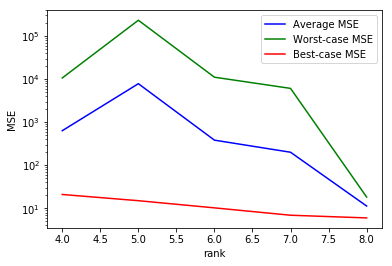

beta: [23.52081098 -0.09706789  0.83677156 -0.37419993 -5.31019853  0.22104035
  2.77941985  1.08206998]
Best-case MSE: [20.978487199844984, 15.046817941473128, 10.259580553117763, 6.920035479288303, 5.9944539574021976]
Worst-case MSE: [10622.602325500104, 232226.68521381848, 11059.130776323262, 6085.1767444411735, 18.299974473931695]


In [11]:
SV_tuner.plot_models()
SV_tuner.model.change_rank(SV_tuner.best_param)
print("beta: {}".format(SV_tuner.best_model.beta))
print("Best-case MSE: {}".format(SV_tuner.lo_mse))
print("Worst-case MSE: {}".format(SV_tuner.hi_mse))

## K Nearest Neighbors
- Test $k$ over a range from 1 to 2/3*data.shape[0].
- Perform 1000 trials, each with training (testing)  2/3 (1/3) of total samples.
- Average MSE for each $k$ over all trials.

--- Make models for KNNRegressor ---
--- Evaluate models for KNNRegressor over 100 trials ---
-> KNNRegressor -- Trial #0
-> KNNRegressor -- Trial #10
-> KNNRegressor -- Trial #20
-> KNNRegressor -- Trial #30
-> KNNRegressor -- Trial #40
-> KNNRegressor -- Trial #50
-> KNNRegressor -- Trial #60
-> KNNRegressor -- Trial #70
-> KNNRegressor -- Trial #80
-> KNNRegressor -- Trial #90
--- Best model for KNNRegressor ---
For KNNRegressor, best param=5 with avg MSE=8.393495666666666


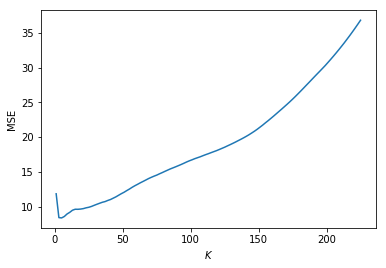

In [12]:
# KNN tuning over 1000 trials
neighbors_K = np.arange(1,int(n_models*2/3),2)
num_K = len(neighbors_K)
KNN_tuner = ModelTuner(KNNRegressor,neighbors_K,split_states)
KNN_tuner.make_models()
KNN_tuner.evaluate_models(X_std,y)
KNN_tuner.get_best_model()
KNN_tuner.plot_models()

## Ridge Regression
- Test parameter weight factor, $\alpha$, over a range from 0 to 4.
- Perform 100 trials, each with training (testing)  70% (15%) of dataset.
- Average MSE for each $\alpha$ over all trials.

--- Make models for RidgeRegressor ---
--- Evaluate models for RidgeRegressor over 100 trials ---
-> RidgeRegressor -- Trial #0
-> RidgeRegressor -- Trial #10
-> RidgeRegressor -- Trial #20
-> RidgeRegressor -- Trial #30
-> RidgeRegressor -- Trial #40
-> RidgeRegressor -- Trial #50
-> RidgeRegressor -- Trial #60
-> RidgeRegressor -- Trial #70
-> RidgeRegressor -- Trial #80
-> RidgeRegressor -- Trial #90
--- Best model for RidgeRegressor ---
For RidgeRegressor, best param=2.04 with avg MSE=11.293591101104186


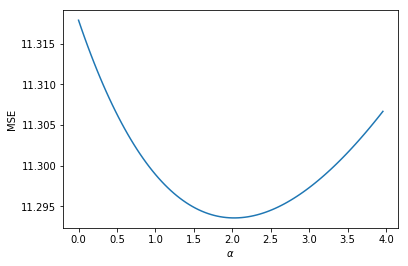

In [13]:
# Ridge tuning over 100 trials
n_alpha = 100
alpha_lim = 4
alphas = [alpha_lim*i/n_alpha for i in range(n_alpha)] 
Ridge_tuner = ModelTuner(RidgeRegressor,alphas,split_states)
Ridge_tuner.make_models()
Ridge_tuner.evaluate_models(X_std,y)
Ridge_tuner.get_best_model()
Ridge_tuner.plot_models()

## Ordinary Least Squares
- Perform 100 trials, each with training (testing)  70% (15%) of dataset.
- Average MSE over all trials.

In [14]:
# OLS Regressor over 1000 trials (random different train/test splits)
OLS_tuner = OLSTuner(OLSRegressor,split_states)
OLS_tuner.evaluate_models(X_std,y)

print("OLS avg MSE: {}".format(OLS_tuner.avg_mse))
print("OLS coefficients: {}".format(OLS_tuner.best_model.model.coef_))
print("OLS intercept: {}".format(OLS_tuner.best_model.model.intercept_))

--- Evaluate OLS for 100 trials ---
OLS avg MSE: 11.317897257779192
OLS coefficients: [-0.09706789  0.83677156 -0.37419993 -5.31019853  0.22104035  2.77941985
  1.08206998]
OLS intercept: 23.520810980363542


## Compare Models on Held-Out Testing Data

- **Comments**:
    - `SingularValueRegressor` has identical performance to the `OLSRegressor` since it finds that the full-rank model has  best MSE performance.
        - These two `Regressors` have the best performance.
    - While I perform 100 trials on random splits, I use the fit model from the last trial for the final testing phase. I might have averaged parameters (i.e., $\beta$ for `OLS`, `SV`, `Ridge`) to improve performance.
    - `SingularValueRegressor` has numerical issues. In particular, by reducing `rank`, the condition number of $A_r$ increases, so there are no guarantees that it is invertible.
        - To accommodate this, I used a `try-except` catch in the `SVTuner` class, but it is possible that this is a band-aid for a bigger underlying problem. I may not have derived the right expression for $A_r$, as I suspect the `Regressor` should have performed better `rank` values.


In [15]:
class ModelCompare():
    def __init__(self,tuners):
        self.tuners = tuners
        self.models = [tuner.best_model for tuner in tuners]
        self.mse = [0]*len(tuners)
        self.names = [model.name for model in self.models]

    def predict_on_models(self,X,y):
        for i in range(len(self.models)):
            if self.models[i].name == "SingularValue":
                X_test = np.hstack((np.ones((X.shape[0],1)),X))
            else:
                X_test = X
            y_hat = self.models[i].predict(X_test)
            mse = mean_squared_error(y,y_hat)
            self.mse[i]=(mse)
        
    def plot_models(self):
        for i in range(len(self.mse)):
            print("{} MSE = {}".format(self.names[i],self.mse[i]))
        plt.bar(self.names, self.mse)
        plt.ylabel("MSE")
        plt.show()
        

OLS MSE = 12.137380586675006
SingularValue MSE = 12.137380586674976
KNN MSE = 15.701450847457627
Ridge MSE = 12.358508208580993


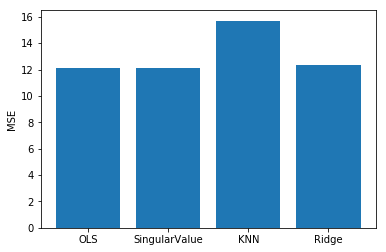

In [16]:
mod_comp = ModelCompare([OLS_tuner,SV_tuner,KNN_tuner,Ridge_tuner])
mod_comp.predict_on_models(X_hold_out,y_hold_out)
mod_comp.plot_models()